<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_nov_2020/blob/main/PSD_GRAIN_NOT_GRAIN_nov_18_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020

from Get_PSDArea import PSDArea
from histogram import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020


In [6]:
!ls

Areas_ImageJ.csv		 IMAGEJ_Zuados.zip
Areas_ImageJ.xlsx		 PSD_GRAIN_NOT_GRAIN_nov_13_2020.ipynb
Doutorado			 PSD_GRAIN_NOT_GRAIN_out_09_2020.ipynb
GetBetterSegm.py		 PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb
Get_PSDArea.py			 PSD_GRAIN_NOT_GRAIN_out_28_2020.ipynb
Histogram_PSD_out_19_2020.ipynb  PSD_USA_ROTINAS_out_05_2020.ipynb
Histogram_PSD_out_23_2020.ipynb  __pycache__
histogram.py			 README.md
imageJ_jpg.zip			 Teste


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

fatal: destination path 'marquesgabi_set_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020


In [11]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [13]:
df=Segmenta(img)


In [14]:
print(df)

    Width           0           1  ...         781         782         783
0     117   46.585434   42.051865  ...   33.448685   31.591862   32.758202
1     197   64.307106   72.591362  ...    5.958025    5.993378    5.686749
2     198  100.518410  101.610550  ...   87.536774   84.512184   89.408424
3     189   60.406036   61.001369  ...    6.278463    7.471879    6.747600
4     187  121.647064  109.704643  ...    0.112900    0.000000    0.188167
..    ...         ...         ...  ...         ...         ...         ...
45    187  100.273582  100.860214  ...    0.562098    0.658984    0.463611
46    129    0.827775    5.150832  ...  107.675980  111.384293  110.500816
47    185   54.137150   51.286362  ...    9.773732    1.536099    0.146706
48    158   66.073219   62.219036  ...    0.000000    0.000000    0.251242
49    188   51.531006   65.364868  ...   46.232685   26.649162   35.289722

[150 rows x 785 columns]


In [15]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 7.6233 - accuracy: 0.4519
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9531 - accuracy: 0.5073
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1982 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.5044
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.5569
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5423
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.5102
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.6618
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8047
Epoch 11/

In [16]:
# y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


In [17]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           1  74


In [18]:
df.shape

(150, 785)

In [19]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [20]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [21]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [22]:
df=Segmenta(img)

In [23]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 7.8188 - accuracy: 0.4694 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.5015
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9039 - accuracy: 0.4927
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.5977
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.5656
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0902 - accuracy: 0.5073
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0735 - accuracy: 0.4985
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.6501
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.6618
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8455
Epoch 11

In [24]:
# print(y_pred.ravel())

In [25]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [26]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [27]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,121,83.761772,84.270752,85.166512,82.250183,82.021790,80.721184,74.420807,67.317329,54.835808,62.504818,59.595181,68.714363,72.635956,83.725494,73.267609,88.107437,90.792427,99.999321,98.067017,92.782661,86.467667,78.346634,66.070763,58.414593,80.167816,86.716690,89.126633,92.293221,83.170135,82.660065,83.370605,80.409470,81.756096,79.357224,73.728096,67.182503,64.192947,67.276215,67.657471,...,67.654877,65.948433,61.864422,60.477631,60.894135,60.646065,59.462059,57.867218,57.689846,60.026161,63.746532,72.782120,86.347855,76.352226,76.060722,86.380913,91.433571,87.651321,79.403938,76.372444,78.346771,81.433441,83.840927,82.695099,80.271973,78.477974,75.006485,73.725571,66.493881,63.779320,60.441437,60.615189,57.434807,57.166248,57.420944,59.091728,58.043648,60.079155,64.896187,70.844269
1,155,91.023354,90.425980,86.570747,79.050247,122.974709,146.404556,145.585785,142.608719,133.611252,136.579163,138.755463,139.131409,140.590057,144.327911,149.274979,147.148849,129.568222,92.517052,92.905930,91.833549,103.796555,106.359131,98.344635,100.239426,103.381149,104.662979,102.373405,104.081375,93.445168,89.561882,86.100403,83.204086,97.933281,135.999893,140.874847,142.023819,144.508636,139.919083,139.485626,...,117.684425,123.886711,128.211578,138.318054,174.839615,193.657074,197.217819,196.928940,190.095169,146.218704,24.336943,42.711887,63.299980,74.756218,75.464020,85.180145,90.892197,97.978821,102.601921,100.587517,95.307724,94.270729,94.981644,94.212532,97.797752,105.089676,105.229149,105.877380,109.965210,119.132584,127.622192,136.799286,158.074631,169.810165,171.430359,173.813538,166.921631,103.013031,23.113714,43.493568
2,130,92.139893,89.986511,87.286865,84.309822,84.146751,82.452545,80.950302,78.194786,72.291359,72.304619,77.237396,87.651596,88.362839,90.857994,86.352188,85.491127,87.329941,83.607819,77.075974,55.696102,42.380592,43.542252,44.814915,47.168995,41.922840,35.465565,24.642603,16.749115,88.537521,86.887810,85.139648,83.489944,84.193138,83.057518,80.155510,76.114326,74.301300,72.988167,73.932785,...,83.222969,62.199059,62.853252,58.642128,54.040474,54.603790,56.015385,57.356926,60.509109,64.498695,68.680954,71.561424,82.382004,80.754082,82.928284,83.547935,123.656815,156.339874,160.198822,163.567352,165.907211,167.354340,160.872208,153.693024,141.223206,132.092789,127.907928,110.946045,78.823906,58.061306,59.484734,58.095860,57.808044,60.503433,65.169472,68.680946,67.378220,68.303200,71.249466,72.198586
3,200,133.791214,146.590805,155.272797,143.117203,140.196411,133.796005,132.045990,125.355995,112.301193,113.040794,111.942406,107.948807,103.680000,102.607597,108.778000,117.130798,117.351196,115.946404,113.009201,96.430397,76.439590,60.309605,53.962799,81.028000,94.764000,92.723602,85.402794,78.430801,134.179611,144.276794,160.691208,184.609589,123.889603,115.854797,119.774406,119.318794,112.451202,112.208405,112.688400,...,81.742409,80.297600,81.110802,84.719604,90.714798,95.037605,74.576393,49.942398,52.430801,34.981201,114.049599,140.849594,105.493996,103.279999,100.786400,67.117996,24.390800,33.798401,51.666000,66.243210,67.244797,68.478798,69.257599,73.220001,73.747200,74.152000,76.622795,77.793190,83.402802,85.515999,85.760002,88.087196,91.582413,98.555206,92.715202,57.381603,43.848396,34.050404,125.129608,129.708801
4,190,102.885422,102.120438,105.926308,108.057281,122.643875,134.914001,134.748352,100.936279,46.560772,47.940048,46.758888,44.701492,45.348145,44.671577,43.225483,47.197781,45.354233,45.558334,48.815289,48.818172,49.255840,50.021709,36.346481,5.060498,2.141274,2.274460,2.043435,2.000000,108.456841,106.110016,107.943153,106.252289,115.327751,129.312225,134.089752,99.553902,40.388142,48.430248,43.526093,...,0.048753,0.0

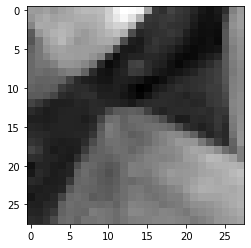

In [28]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [29]:
df_getBetter = GetBetter(img)
#df_getBetter = GetBetter(data)

In [30]:
df_getBetter.shape

(50, 785)

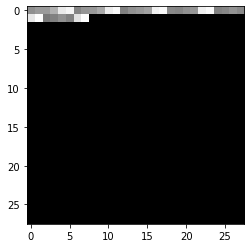

In [31]:
qual_img =21
data=np.array(df_getBetter.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")


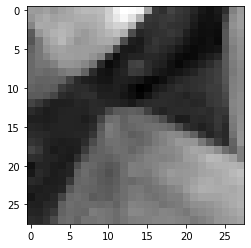

In [32]:
plt.imshow(Foto, cmap = "gray")


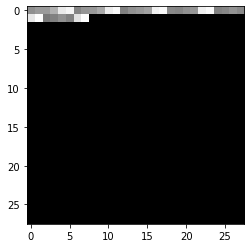

In [33]:
plt.imshow(img28, cmap = "gray")

In [34]:
mean_value = np.mean(img)
img_new = img.copy()

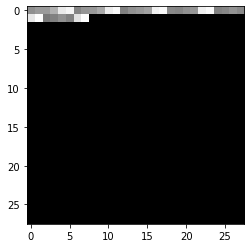

In [35]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [36]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

206.512725090036


In [37]:
Area_All, Diameter_All=PSDArea(df_size) 


In [38]:
df_size.shape

(146, 785)

In [39]:
# print(Area_All)
print(Diameter_All)

[1.0732161515115186, 1.4347267100493573, 1.0808580862060848, 1.6249537031046053, 1.536860281255978, 1.6299770636230095, 1.0689926067773774, 1.1450687944341125, 1.8449383620588546, 1.6498283444520951, 0.8515338763942516, 1.6338929631890697, 0.8882083151323499, 1.545180222523664, 1.529817687167308, 1.4631142121787772, 1.0309466410133823, 1.419740229363182, 1.362966980005216, 1.2783707411193663, 0.8743751351579282, 1.1908383849248019, 1.2053144233673856, 1.3823198682676654, 0.9806232107227637, 0.9885610085107589, 1.4716298558344385, 1.368813626441024, 1.1765934621856906, 1.3241027248335755, 1.1395104739649062, 1.3652212975277949, 1.6864255032825248, 1.424120939952569, 1.3646837515181496, 0.9710249770417603, 1.6182290653727867, 1.012161364458099, 1.3162124995147306, 0.9742061794629281, 1.2871043544194205, 1.5071041997865124, 1.3293202803624542, 1.0671574318689354, 1.4892737489100374, 0.843274870205896, 1.737647617232965, 0.9188126925848054, 1.0124802895200897, 1.8988099906516387, 1.2714819

In [40]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          1.36986301
 15.06849315 21.91780822 61.64383562]


In [41]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [42]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [43]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

[ 0.          0.          0.          0.          0.          4.21052632
 10.52631579 23.15789474 62.10526316]
[ 0.          0.          0.          0.          0.          1.36986301
 15.06849315 21.91780822 61.64383562]


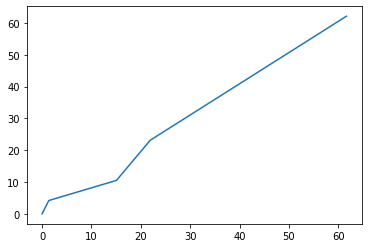

In [44]:
plt.plot( Perc_value,Perc_new )

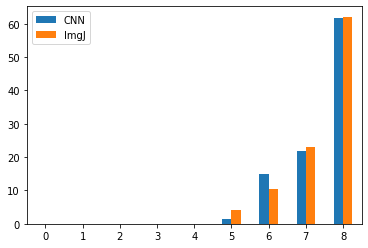

In [45]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [46]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ImgJ   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     777.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.96e-08
Time:                        19:29:15   Log-Likelihood:                -18.252
No. Observations:                   9   AIC:                             40.50
Df Residuals:                       7   BIC:                             40.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0292      0.801      0.036      0.9

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


(array([[35., 49., 52., 10.,  0.],
        [19., 53., 20.,  1.,  2.]]),
 array([0.75356807, 1.06634229, 1.37911652, 1.69189074, 2.00466497,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

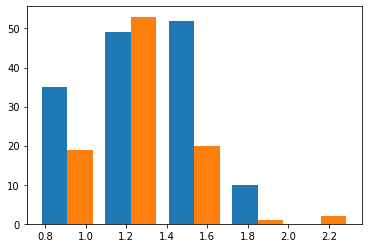

In [47]:
Diam = PSD_value # foto que esta fazendo
Diam = Diameter_All # foto que esta fazendo
# Diam1  # imageJ

plt.hist([Diam,Diam1], 5)

(array([51., 42.,  2.]),
 array([0.75356807, 1.27485844, 1.79614882, 2.31743919]),
 <a list of 3 Patch objects>)

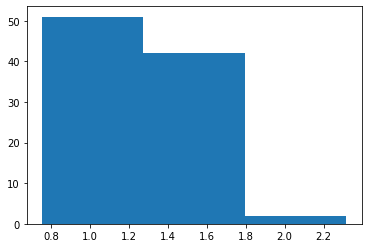

In [48]:
plt.hist(Diam1, 3)

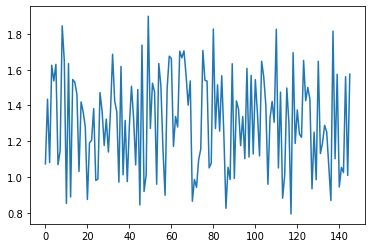

In [49]:
#plt.plot(Diam)
plt.plot(Diameter_All)

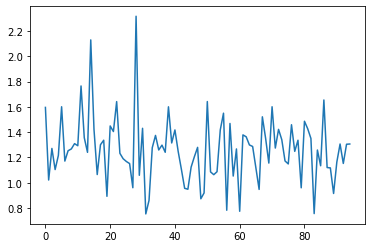

In [50]:
plt.plot(Diam1)